In [1]:
!pip install kaggle

In [2]:
!pip freeze > requirements.txt

In [2]:
import kaggle
!kaggle datasets download hesh97/titanicdataset-traincsv

Dataset URL: https://www.kaggle.com/datasets/hesh97/titanicdataset-traincsv
License(s): CC0-1.0
  0%|                                               | 0.00/22.0k [00:00<?, ?B/s]
100%|██████████████████████████████████████| 22.0k/22.0k [00:00<00:00, 9.91MB/s]


In [5]:
# Unzip the downloaded file
import zipfile
import os

dataset_path = "titanicdataset-traincsv.zip"
with zipfile.ZipFile(dataset_path, "r") as zip_ref:
    zip_ref.extractall("dataset_exercise")  # Extract files to a folder

In [41]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns #density plot

In [10]:
!pip install seaborn

In [11]:
!pip freeze > requirements.txt

In [16]:
!ls

Exercise16_probability_review.ipynb  epsilon_greedy.py
Exercise25_confidence_interval.ipynb epsilon_greedy_starter.py
Exercise33_ztest.ipynb               ex_chisq.py
Exercise34_ztest2.ipynb              ex_ttest.py
advertisement_clicks.csv             extra_reading.txt
bayesian_bandit.py                   myenv
bayesian_normal.py                   optimistic.py
bayesian_starter.py                  optimistic_starter.py
cdfs_and_percentiles.py              requirements.txt
chisquare.py                         server_solution.py
ci_comparison.py                     server_starter.py
client.py                            titanicdataset-traincsv.zip
comparing_epsilons.py                train.csv
convergence.py                       ttest.py
dataset                              ucb1.py
dataset_exercise                     ucb1_starter.py
demo.py


In [18]:
!ls dataset_exercise

train.csv


In [2]:
df = pd.read_csv("dataset_exercise/train.csv")

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [31]:
# Adjust display to show all columns
pd.set_option('display.max_columns', None)

#...

# Reset display option to default
pd.reset_option('display.max_columns')

In [4]:
# Goal: check if there is a difference of fares between the survied and not survived group

In [10]:
type(df['Survived'])

pandas.core.series.Series

In [14]:
df['Survived']==1 # df['Survived'==1] does not work!!!

0      False
1       True
2       True
3       True
4      False
       ...  
886    False
887     True
888    False
889     True
890    False
Name: Survived, Length: 891, dtype: bool

In [17]:
df[df['Survived']==1]['Fare']

1      71.2833
2       7.9250
3      53.1000
8      11.1333
9      30.0708
        ...   
875     7.2250
879    83.1583
880    26.0000
887    30.0000
889    30.0000
Name: Fare, Length: 342, dtype: float64

In [19]:
type(df[df['Survived']==1]['Fare'].dropna())

pandas.core.series.Series

In [26]:
help(df.to_numpy)  #help(pd.to_numpy) does not work

Help on method to_numpy in module pandas.core.frame:

to_numpy(
    dtype: 'npt.DTypeLike | None' = None,
    copy: 'bool' = False,
    na_value: 'object' = <no_default>
) -> 'np.ndarray' method of pandas.core.frame.DataFrame instance
    Convert the DataFrame to a NumPy array.

    By default, the dtype of the returned array will be the common NumPy
    dtype of all types in the DataFrame. For example, if the dtypes are
    ``float16`` and ``float32``, the results dtype will be ``float32``.
    This may require copying data and coercing values, which may be
    expensive.

    Parameters
    ----------
    dtype : str or numpy.dtype, optional
        The dtype to pass to :meth:`numpy.asarray`.
    copy : bool, default False
        Whether to ensure that the returned value is not a view on
        another array. Note that ``copy=False`` does not *ensure* that
        ``to_numpy()`` is no-copy. Rather, ``copy=True`` ensure that
        a copy is made, even if not strictly necessary.
  

In [28]:
x1 = df[df['Survived']==1]['Fare'].dropna().to_numpy()
x2 = df[df['Survived']==0]['Fare'].dropna().to_numpy()

In [39]:
!pip show seaborn

Name: seaborn
Version: 0.13.2
Summary: Statistical data visualization
Home-page: 
Author: 
Author-email: Michael Waskom <mwaskom@gmail.com>
License: 
Location: /Users/chuqing/Downloads/LazyProgrammer/machine_learning_exercises/ab_testing/myenv/lib/python3.13/site-packages
Requires: matplotlib, numpy, pandas
Required-by: 


In [44]:
help(sns.kdeplot)

Help on function kdeplot in module seaborn.distributions:

kdeplot(
    data=None,
    *,
    x=None,
    y=None,
    hue=None,
    weights=None,
    palette=None,
    hue_order=None,
    hue_norm=None,
    color=None,
    fill=None,
    multiple='layer',
    common_norm=True,
    common_grid=False,
    cumulative=False,
    bw_method='scott',
    bw_adjust=1,
    warn_singular=True,
    log_scale=None,
    levels=10,
    thresh=0.05,
    gridsize=200,
    cut=3,
    clip=None,
    legend=True,
    cbar=False,
    cbar_ax=None,
    cbar_kws=None,
    ax=None,
    **kwargs
)
    Plot univariate or bivariate distributions using kernel density estimation.

    A kernel density estimate (KDE) plot is a method for visualizing the
    distribution of observations in a dataset, analogous to a histogram. KDE
    represents the data using a continuous probability density curve in one or
    more dimensions.

    The approach is explained further in the :ref:`user guide <tutorial_kde>`.

    Rel

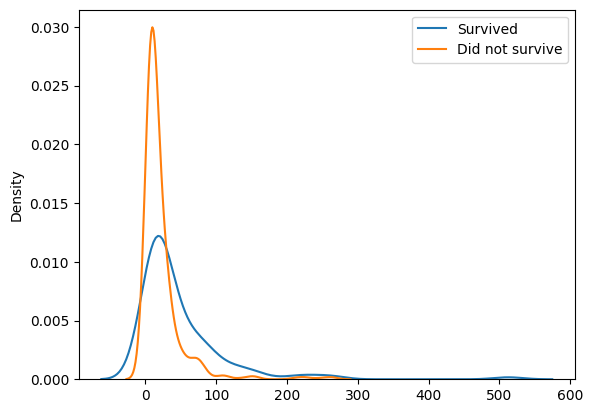

In [52]:
sns.kdeplot(x1, label='Survived') #kernel density estimate
sns.kdeplot(x2, label='Did not survive')
plt.legend()

In [47]:
help(plt.legend)

Help on function legend in module matplotlib.pyplot:

legend(*args, **kwargs) -> 'Legend'
    Place a legend on the Axes.

    Call signatures::

        legend()
        legend(handles, labels)
        legend(handles=handles)
        legend(labels)

    The call signatures correspond to the following different ways to use
    this method:

    **1. Automatic detection of elements to be shown in the legend**

    The elements to be added to the legend are automatically determined,
    when you do not pass in any extra arguments.

    In this case, the labels are taken from the artist. You can specify
    them either at artist creation or by calling the
    :meth:`~.Artist.set_label` method on the artist::

        ax.plot([1, 2, 3], label='Inline label')
        ax.legend()

    or::

        line, = ax.plot([1, 2, 3])
        line.set_label('Label via method')
        ax.legend()

    .. note::
        Specific artists can be excluded from the automatic legend element
        selectio

In [51]:
x1.mean(), x2.mean()

(np.float64(48.39540760233918), np.float64(22.117886885245902))

In [61]:
from statsmodels.stats.weightstats import ztest

In [62]:
ztest(x1,x2)

(np.float64(7.939191660871055), np.float64(2.035031103573988e-15))